Home Work 6 Hillel AI

Задачи

-- Разбейте датасет на 75% тренировочных и 25% тестовых данных. Проведите анализ признаков. Какие признаки можно исключить? Сколько пустых значений? Постройте графики для лучшего понимания признаков.

-- Используйте логистическую регрессию для решения задачи бинарной классификации.

-- Постройте матрицу корреляций, что можно по ней сказать?

-- Постройте отчёт по метрикам классификации, что видно из этого отчёта?

-- Попробуйте поменять параметры Логистической регрессии. Что это даёт?


Опционально:

-- Сделайте кросс-валидацию (K-Fold)

-- Проверьте свои результаты в соревновании с тем же датасетом. Сделайте хотябы 3 попытки получить наибольшую метрику.
https://www.kaggle.com/c/titanic

=====================================================================================================================

Для начала, возьмем данные что нам нужны

ИМПОРТ ДАННЫХ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv', sep =',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


АНАЛИЗ ДАННЫХ

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- Сразу по таблице можно сделать вывод, что имя никак не поможет выжить на титанике и id.
- Средний возраст людей на титанике - 29 лет.
- Найбольшее количество родтсвеников (братья, сестры, супруги) - 8
- Найбольшее количество детей/родителей на борту - 6
- всего 3 класса (1,2,3). В основном, на Титанике люди были пасажирами 2 класса.
- Цельевая колонка - числовая и на вопрос вижил или нет дает 0 или 1. Задача Классификации
- Под вопросом - количество родствеников и детей (колонки SibSp и Parch), транспортные расходы, кабина и билет (Ticket) 

In [6]:
df = df.drop(columns = ["PassengerId", "Name"])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


Посмотрим, сколько у нас пропущеных значений и в каких колонках

In [7]:
s = df.isna().sum()
s = s[s != 0].sort_values(ascending=False)
s

Cabin       687
Age         177
Embarked      2
dtype: int64

Как видим, много пропущеных мы не знаем возраста у 177 людей на Титанике, не знаем в какой кабине были 687 людей в титанике, что крайне много для 890 всего, поэтому из этой колонки сделать какие-то либо данные будет очень сложно и, скорее всего те данные что мы проанализируем из 207 людей будут недостоверны.

Построим матрицу коррелций

МАТРИЦА КОРРЕЛЯЦИЙ

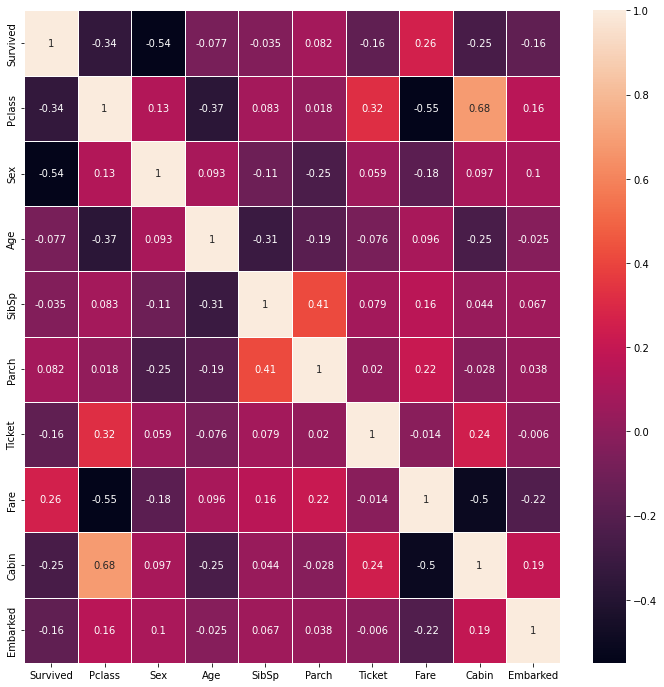

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df2 = df.copy()
df2.Sex = label_encoder.fit_transform(df2.Sex.tolist())
df2.Ticket = label_encoder.fit_transform(df2.Ticket.tolist())
df2.Cabin = label_encoder.fit_transform(df2.Cabin.tolist())
df2.Embarked = label_encoder.fit_transform(df2.Embarked.tolist())

fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches

corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax);

ГРАФКИ

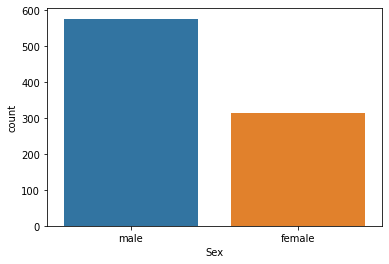

In [9]:
ax = sns.countplot(x="Sex", data=df)

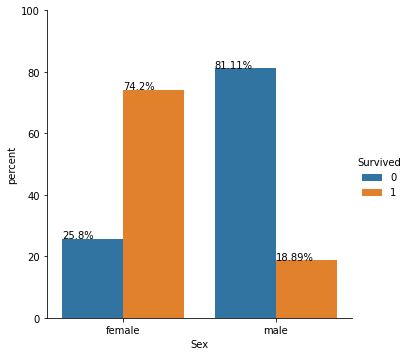

In [10]:
df1 = df.groupby('Sex')['Survived'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'Sex', y = 'percent', hue = 'Survived', kind = 'bar', data = df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [11]:
# Function: Copy-pasted from question and modified
def get_num_people_by_age_category(df):
    df["Age_group"] = pd.cut(x=df['Age'], bins=[0,10,20,30,40,50,60,70,80], labels=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80"])
    return df

In [12]:
# Call function
df = get_num_people_by_age_category(df)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,31-40
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,31-40
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,31-40
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,21-30
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,11-20
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,21-30


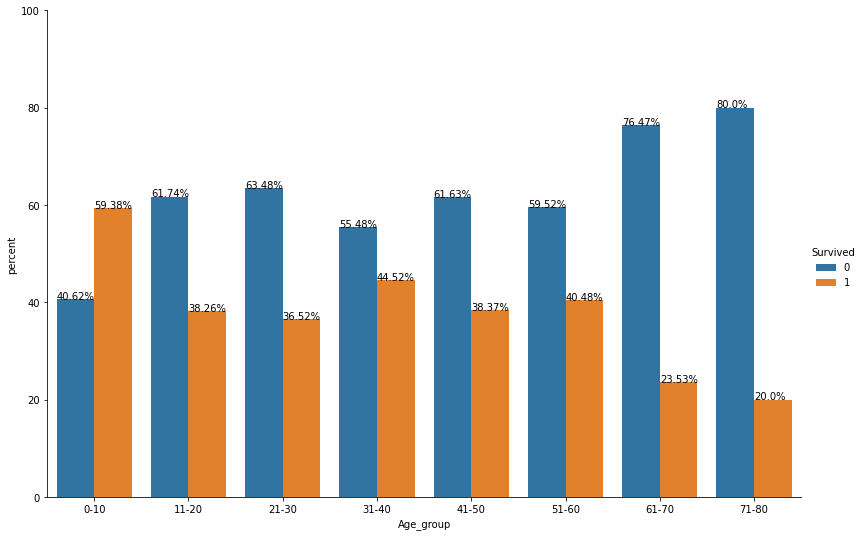

In [13]:
df1 = df.groupby('Age_group')['Survived'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'Age_group', y = 'percent', hue = 'Survived', kind = 'bar', data = df1, height = 7.5, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

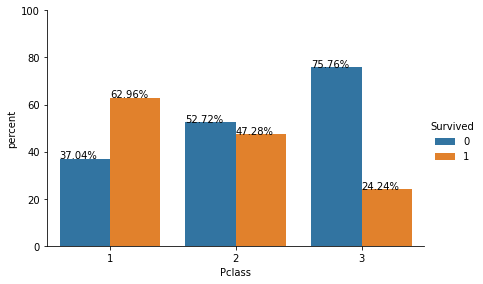

In [14]:
df1 = df.groupby('Pclass')['Survived'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'Pclass', y = 'percent', hue = 'Survived', kind = 'bar', data = df1, height = 4, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

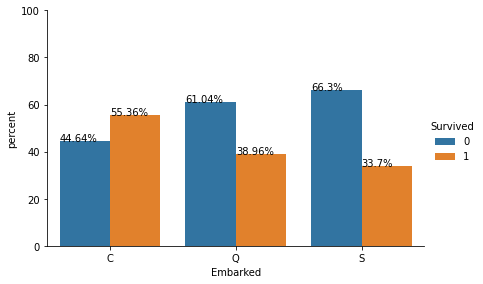

In [15]:
df1 = df.groupby('Embarked')['Survived'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'Embarked', y = 'percent', hue = 'Survived', kind = 'bar', data = df1, height = 4, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

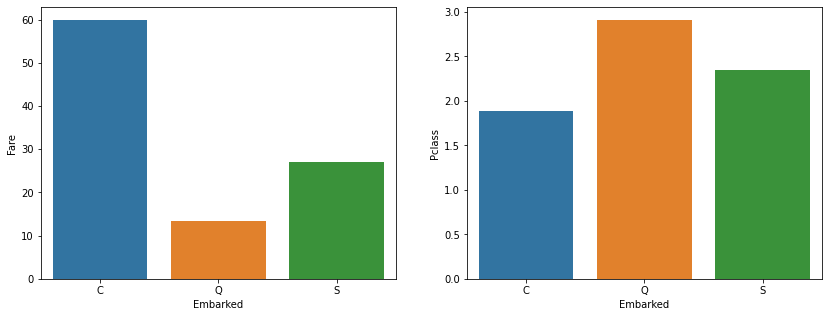

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

df1 = df.groupby('Embarked')['Fare'].mean()
df1 = df1.rename('Fare').reset_index()

df2 = df.groupby('Embarked')['Pclass'].mean()
df2 = df2.rename('Pclass').reset_index()

sns.barplot(ax = ax1, x = 'Embarked', y = 'Fare', data = df1)
sns.barplot(ax = ax2, x = 'Embarked', y = 'Pclass', data = df2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

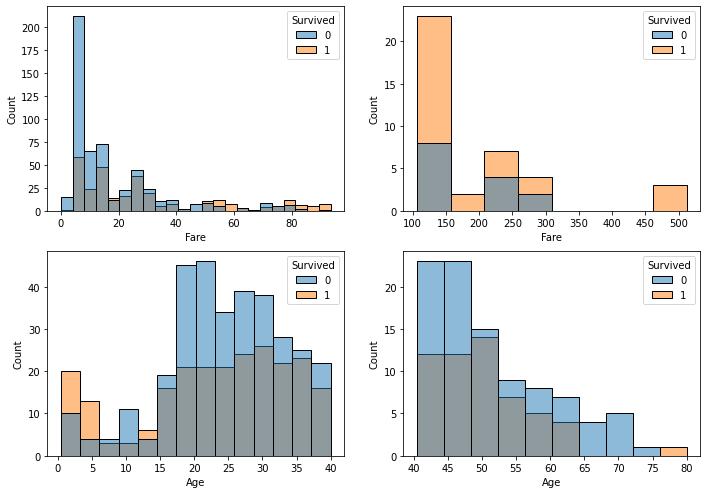

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11.7, 8.27))
sns.histplot(ax = ax1, data = df[df['Fare'] <= 100], x = 'Fare', hue = 'Survived')
sns.histplot(ax = ax2, data = df[df['Fare'] > 100], x = 'Fare', hue = 'Survived')
sns.histplot(ax = ax3, data = df[df['Age'] <= 40], x = 'Age', hue = 'Survived')
sns.histplot(ax = ax4, data = df[df['Age'] > 40], x = 'Age', hue = 'Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

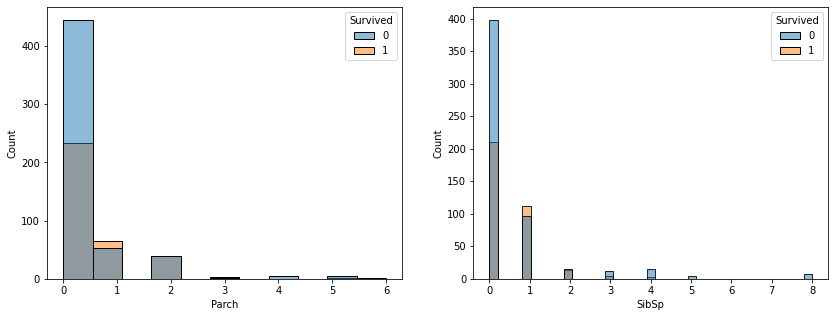

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(ax = ax1, data = df, x = 'Parch', hue = 'Survived')
sns.histplot(ax = ax2, data = df, x = 'SibSp', hue = 'Survived')

как видим, по графикам выше: 
- Возраст играет роль выжил человек или нет. Чем моложе человек, тем больше шансов выжить.
- То откуда прибыли пассажиры, судя по графикам влияет на то выжили они или нет. Так из пункта C выжило 55%, когда у остольных этот показатель меньше 40%. Вероятно, это связано с тем, что затраты на путешествия у этой группы людей больше остольных и те покупали места 1 класса.
- Чем больше человек тратил тем больше шансов было на его спасение
- Из количества родствеников на борту нельзя сделать какой-либо вывод
- Людей первого класса (боатых) в процентном соотношении выжило больше чем людей второго класса и гораздо больше чем людей третего класса
- Женщин спаслось больше чем мужчин.

In [19]:
df = df.drop(columns = ["Ticket", "Parch", "SibSp", "Age_group"])
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN,S
887,1,1,female,19.0,30.0000,B42,S
888,0,3,female,NaN,23.4500,NaN,S
889,1,1,male,26.0,30.0000,C148,C


РАЗБИЕНИЕ ДАННЫХ

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_train.sort_index()

,Pclass,Sex,Age,Fare,Cabin,Embarked
0,3,male,22.0,7.2500,NaN,S
1,1,female,38.0,71.2833,C85,C
2,3,female,26.0,7.9250,NaN,S
3,1,female,35.0,53.1000,C123,S
4,3,male,35.0,8.0500,NaN,S
...,...,...,...,...,...,...
883,2,male,28.0,10.5000,NaN,S
884,3,male,25.0,7.0500,NaN,S
887,1,female,19.0,30.0000,B42,S
888,3,female,NaN,23.4500,NaN,S


In [22]:
X_test.sort_index()

,Pclass,Sex,Age,Fare,Cabin,Embarked
5,3,male,NaN,8.4583,NaN,Q
7,3,male,2.0,21.0750,NaN,S
10,3,female,4.0,16.7000,G6,S
23,1,male,28.0,35.5000,A6,S
25,3,female,38.0,31.3875,NaN,S
...,...,...,...,...,...,...
877,3,male,19.0,7.8958,NaN,S
880,2,female,25.0,26.0000,NaN,S
885,3,female,39.0,29.1250,NaN,Q
886,2,male,27.0,13.0000,NaN,S


ОБУЧЕНИЕ

In [23]:
from sklearn.linear_model import LogisticRegression
pd.options.mode.chained_assignment = None
logisticRegr = LogisticRegression()

In [24]:
X_train.Sex = label_encoder.fit_transform(X_train.Sex.tolist())
X_train.Cabin = label_encoder.fit_transform(X_train.Cabin.tolist())
X_train.Embarked = label_encoder.fit_transform(X_train.Embarked.tolist())
X_train.fillna(X_train.mean(), inplace = True)
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [25]:
X_test.Sex = label_encoder.fit_transform(X_test.Sex.tolist())
X_test.Cabin = label_encoder.fit_transform(X_test.Cabin.tolist())
X_test.Embarked = label_encoder.fit_transform(X_test.Embarked.tolist())
X_test.fillna(X_test.mean(), inplace = True)
y_pred = logisticRegr.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(y_test, y_pred)
array

array([[109,  25],
       [ 22,  67]])

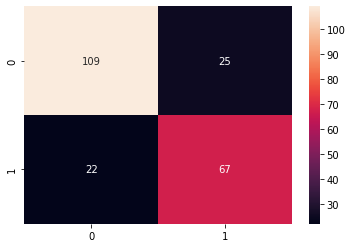

In [27]:
ax = plt.subplot()
sns.heatmap(array, annot=True, fmt='g', ax=ax);

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7892376681614349

ПОСТОРАЕМСЯ УЛУЧШИТЬ РЕЗУЛЬТАТ

In [29]:
from sklearn import preprocessing 
X_train_save = X_train.copy()
X_test_save = X_test.copy()
scaling = preprocessing.MinMaxScaler()
X_train[['Age']] = scaling.fit_transform(X_train[['Age']])
X_train[['Fare']] = scaling.fit_transform(X_train[['Fare']])
X_train[['Cabin']] = scaling.fit_transform(X_train[['Cabin']])
X_train

,Pclass,Sex,Age,Fare,Cabin,Embarked
298,1,1,0.364430,0.059532,0.345133,2
884,3,1,0.308872,0.013761,1.000000,2
247,2,0,0.296306,0.028302,1.000000,2
478,3,1,0.271174,0.014680,1.000000,2
305,1,1,0.006283,0.295806,0.415929,2
...,...,...,...,...,...,...
106,3,0,0.258608,0.014932,1.000000,2
270,1,1,0.364430,0.060508,1.000000,2
860,3,1,0.509927,0.027538,1.000000,2
435,1,0,0.170646,0.234224,0.309735,2


In [30]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
X_test[['Age']] = scaling.fit_transform(X_test[['Age']])
X_test[['Fare']] = scaling.fit_transform(X_test[['Fare']])
X_test[['Cabin']] = scaling.fit_transform(X_test[['Cabin']])
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7892376681614349

Сделаем кросс валидацию

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X.fillna(X.mean(), inplace = True)
X.Sex = label_encoder.fit_transform(X.Sex.tolist())
X.Cabin = label_encoder.fit_transform(X.Cabin.tolist())
X.Embarked = label_encoder.fit_transform(X.Embarked.tolist())
X_1 = scaler.fit_transform(X)
X_1

array([[ 0.82737724,  0.73769513, -0.5924806 , -0.50244517,  0.45150219,
         0.58111394],
       [-1.56610693, -1.35557354,  0.63878901,  0.78684529, -1.38162664,
        -1.93846038],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.48885426,  0.45150219,
         0.58111394],
       ...,
       [ 0.82737724, -1.35557354,  0.        , -0.17626324,  0.45150219,
         0.58111394],
       [-1.56610693,  0.73769513, -0.2846632 , -0.04438104, -1.9648949 ,
        -1.93846038],
       [ 0.82737724,  0.73769513,  0.17706291, -0.49237783,  0.45150219,
        -0.67867322]])

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
logisticRegr = LogisticRegression()

scores = cross_val_score(logisticRegr, X_1, y, cv=kf, scoring='explained_variance')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [ 0.19382239  0.05123033  0.22420635 -0.13054654  0.05827093]
Средняя метрика на кросс-валидации: 0.07939669473036923


In [45]:
scores = cross_val_score(logisticRegr, X_1, y, cv=kf, scoring='max_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-1 -1 -1 -1 -1]
Средняя метрика на кросс-валидации: -1.0


In [46]:
scores = cross_val_score(logisticRegr, X_1, y, cv=kf, scoring='neg_mean_squared_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.19553073 -0.2247191  -0.18539326 -0.26404494 -0.21910112]
Средняя метрика на кросс-валидации: -0.2177578306446551


In [47]:
scores = cross_val_score(logisticRegr, X_1, y, cv=kf, scoring='r2')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [ 0.19369369  0.04262471  0.22301587 -0.13176407  0.05486726]
Средняя метрика на кросс-валидации: 0.07648749366983407


Если метрика отрицательна, значит эта метрика не подходит.